In [64]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%env PYTHONHASHSEED=0
import numpy as np
import pandas as pd
import pygsp
from IPython.display import clear_output 
from scipy.stats import powerlaw
import pickle as pkl
from collections import Counter
clear_output()

In [2]:
%load_ext autoreload
%autoreload 1
%aimport utils

In [3]:
from utils import *

In [4]:
sns.set_style('whitegrid')

### Dataset Importation
The dataset is imported into a pandas dataset. The two first collumns are used to generate a directed graph from the list of edges.

Dataset is hosted at https://zenodo.org/record/1186215

In [5]:
G_belfast = import_graph('belfast', disp=True)

   from_stop_I  to_stop_I    d  duration_avg  n_vehicles  \
0            1          3  300     60.000000          43   
1            2        113  434     79.495268         317   
2            2        115  727    246.666667           9   
3            2          4  326     78.181818         165   
4            2        613  756    300.000000          34   

                                      route_I_counts  route_type  
0                                   9:3,4:30,5:8,7:2           3  
1  43:14,37:7,42:11,75:82,44:3,77:15,78:2,27:12,5...           3  
2                                               60:9           3  
3                      57:54,35:15,36:11,65:24,63:61           3  
4                                              71:34           3  


In [6]:
G_adelaide = import_graph('adelaide')
G_berlin = import_graph('berlin')
G_bordeaux = import_graph('bordeaux')
G_canberra = import_graph('canberra')
G_rennes = import_graph('rennes')

In [7]:
City_list =[(G_adelaide, "adelaide"),
             (G_belfast, "belfast"),
             (G_berlin, "berlin"),
             (G_bordeaux, "bordeaux"),
             (G_canberra, "canberra"),
             (G_rennes, "rennes")]

### Degree analysis

The city of adelaide graph has 7548 nodes and 9257 edges.
The city of belfast graph has 1917 nodes and 2181 edges.
The city of berlin graph has 4601 nodes and 11597 edges.
The city of bordeaux graph has 3435 nodes and 4039 edges.
The city of canberra graph has 2764 nodes and 3218 edges.
The city of rennes graph has 1407 nodes and 1671 edges.


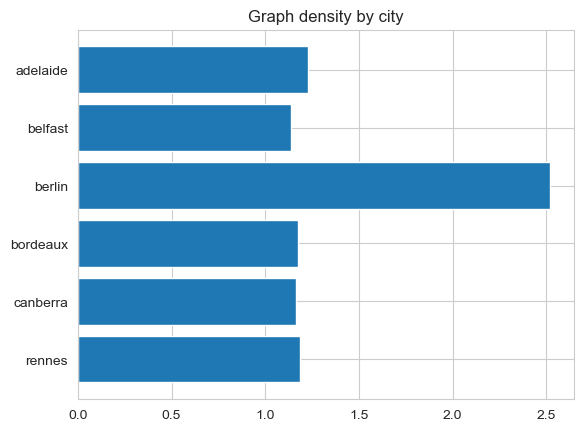

In [8]:
node_edge_ratio = []
for city in City_list:
    print('The city of {} graph has {} nodes and {} edges.'.format(city[1], city[0].number_of_nodes(), city[0].size()))
    node_edge_ratio.append(city[0].size()/city[0].number_of_nodes())
    
City_name = [city[1] for city in City_list]
plt.barh(-np.arange(len(City_list)), node_edge_ratio)
plt.yticks(-np.arange(len(City_list)), City_name)
plt.title("Graph density by city")
# plt.grid()
plt.show()

By analysing the number of nodes of edges of the cities we can see the the graphs are extremely sparce. Most of the graphs have a density below 1.5 with the most dense graphs having a density value of aroud 2.5 .

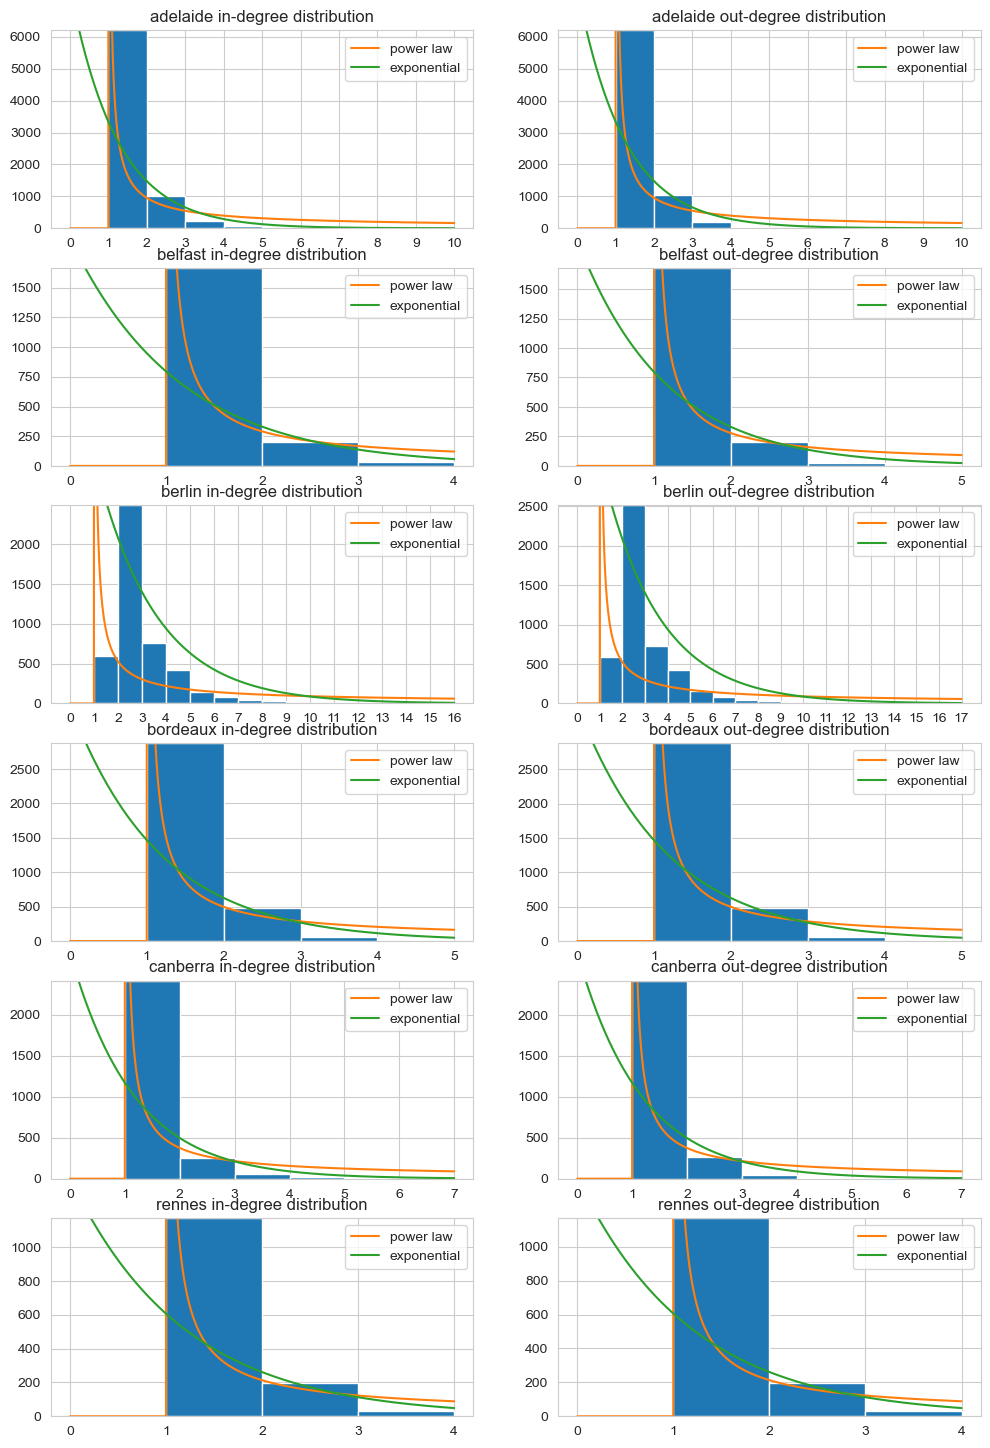

In [62]:
fig, axes = plt.subplots(len(City_list), 2, figsize=(12, 18))

for idx, city in enumerate(City_list):
    G = city[0]
    degrees_in = [d[1] for d in G.in_degree]
    degrees_out = [d[1] for d in G.out_degree]

    a = 0.2
    
    # Plot in-degree distribution
    x = np.linspace(0, max(degrees_in)-1, 10000) 
    y = plot_hist(degrees_in, axes[idx, 0], '{} in-degree distribution'.format(city[1]))

    # Plot power-law 
    axes[idx, 0].plot(x, powerlaw(a,loc= 1,  scale=max(degrees_in)-1).pdf(x)*np.size(degrees_in), label='power law')
    axes[idx, 0].set_ylim(0, np.max(y))

    # Plot exponential distribution
    axes[idx, 0].plot(x, np.exp(-x/np.mean(degrees_in))*np.size(degrees_in), label='exponential')
    axes[idx, 0].set_ylim(0, np.max(y))

    axes[idx, 0].legend()

    # Plot out-degree distribution
    x = np.linspace(0, max(degrees_out)-1, 10000) 
    y = plot_hist(degrees_out, axes[idx, 1], '{} out-degree distribution'.format(city[1]))

    # Plot power law
    axes[idx, 1].plot(x, powerlaw(a,loc= 1,  scale=max(degrees_out)-1).pdf(x)*np.size(degrees_out), label='power law')
    axes[idx, 1].set_ylim(0, np.max(y))
    
    # Plot exponential distribution
    axes[idx, 1].plot(x, np.exp(-x/np.mean(degrees_out))*np.size(degrees_out), label='exponential')
    axes[idx, 1].set_ylim(0, np.max(y))

    axes[idx, 1].legend()

From the degree histograms we can observe that in the different networks, the degree distribution is almost identical for in- and out-degree. This can be explained by the fact that in a transport network, most stops will have as many incoming and outgoing lines . 

### Routes analysis

In [100]:
for City in City_list:
    G = City[0].to_undirected()
    routes=nx.get_edge_attributes(G,'routes')
    routes = {k: v.split(',') for k, v in routes.items()}
    routes_list = []
    for key, value in routes.items():
        routes_list.extend(value)
    unique_routes = list(set(routes_list))

    mean_routes = np.mean([routes_list.count(route) for route in unique_routes])
    print('mean number of edges per unique route: {}'.format(mean_routes))

mean number of edges per unique route: 27.19472789115646
mean number of edges per unique route: 27.706422018348626
mean number of edges per unique route: 5.391951006124234
mean number of edges per unique route: 24.948497854077253
mean number of edges per unique route: 24.095238095238095
mean number of edges per unique route: 14.882758620689655


### Undirected graph analysis

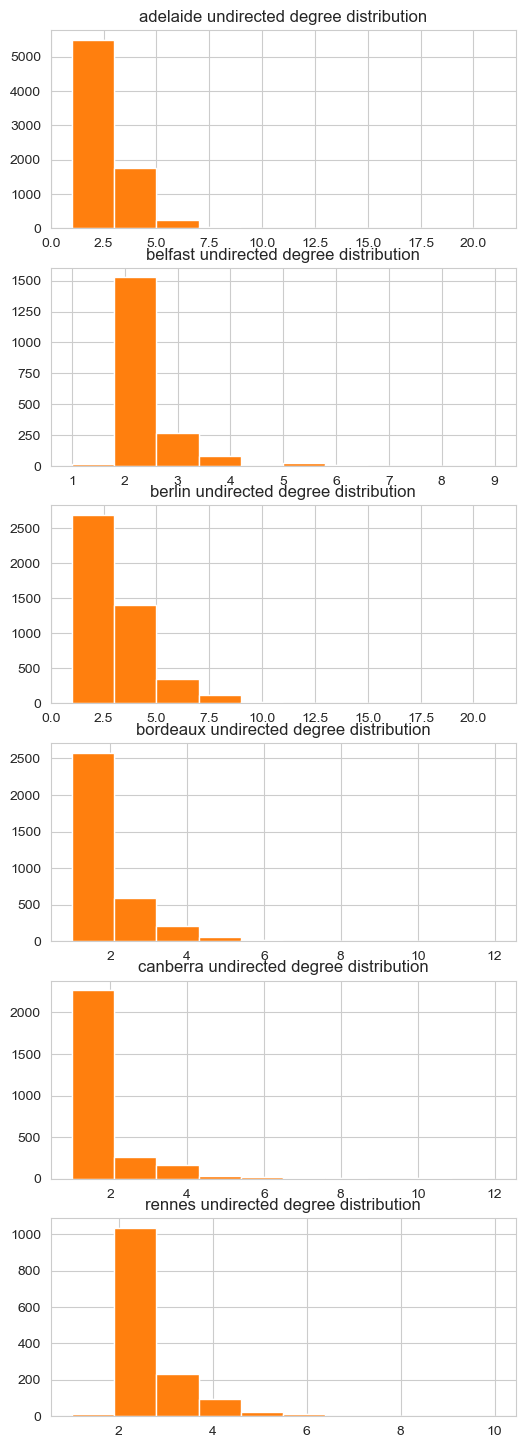

In [10]:
moment1_list = []
moment2_list = []

fig, axes = plt.subplots(len(City_list), 1, figsize=(6, 18))

for idx, city in enumerate(City_list):
    G = city[0].to_undirected()
    degrees = [d[1] for d in G.degree]
    moment1_list.append(np.sum(degrees)/len(degrees))
    moment2_list.append(np.sum(np.square(degrees))/len(degrees))

    
    axes[idx].set_title('{} undirected degree distribution'.format(city[1]))
    axes[idx].hist(degrees);
    axes[idx].set_title('{} undirected degree distribution'.format(city[1]))
    axes[idx].hist(degrees);

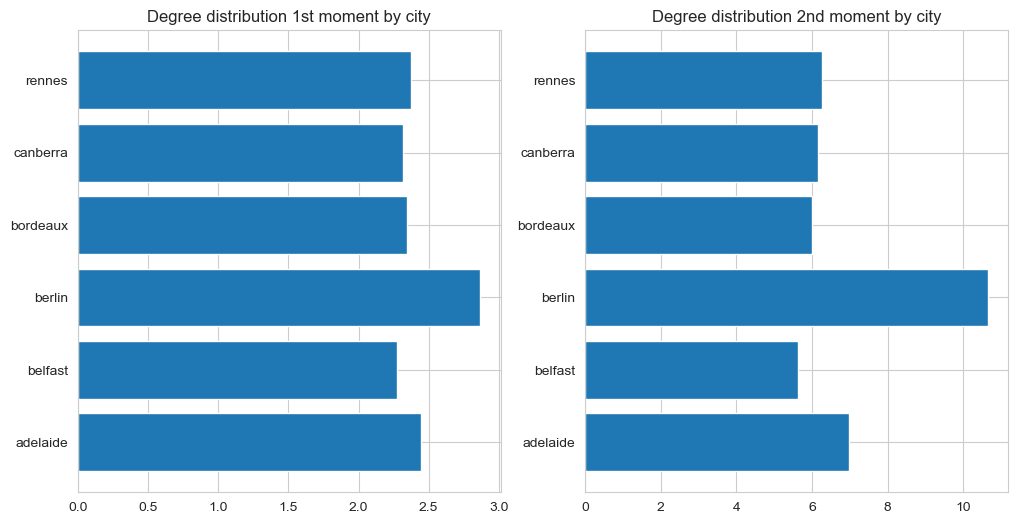

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

City_name = [city[1] for city in City_list]
axes[0].barh(np.arange(len(City_list)),moment1_list)
axes[0].set_yticks(np.arange(len(City_list)), City_name)
axes[0].set_title("Degree distribution 1st moment by city")
# axes[0].grid()

axes[1].barh(np.arange(len(City_list)),moment2_list)
axes[1].set_yticks(np.arange(len(City_list)), City_name)
axes[1].set_title("Degree distribution 2nd moment by city")
# axes[1].grid()
plt.show()

The city of adelaide graph has a clustering coefficient of 0.011435099182376632.
The city of belfast graph has a clustering coefficient of 0.004875342590522558.
The city of berlin graph has a clustering coefficient of 0.08841687337441646.
The city of bordeaux graph has a clustering coefficient of 0.006082177566893731.
The city of canberra graph has a clustering coefficient of 0.00798173649850525.
The city of rennes graph has a clustering coefficient of 0.009044347423878338.


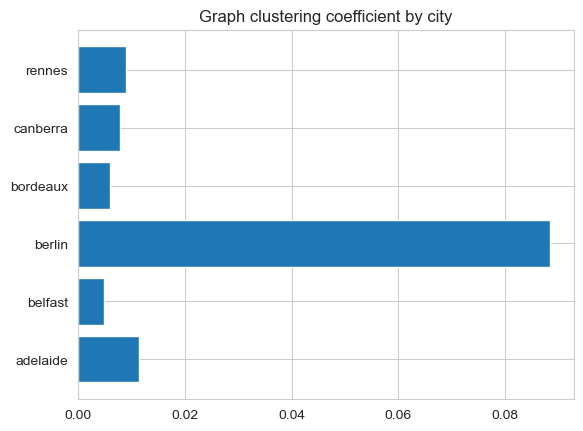

In [12]:
clust_list = []
for city in City_list:
    print('The city of {} graph has a clustering coefficient of {}.'.format(city[1], nx.average_clustering(city[0])))
    clust_list.append(nx.average_clustering(city[0]))
    
City_name = [city[1] for city in City_list]
plt.barh(np.arange(len(City_list)),clust_list)
plt.yticks(np.arange(len(City_list)), City_name)
plt.title("Graph clustering coefficient by city")
# plt.grid()
plt.show()

## Comparison with Network Models

### ER model


In [61]:
G_er_list = np.empty(len(City_list), dtype=object)
for idx, city in enumerate(City_list):
    G = city[0].to_undirected()
    n = len(G.nodes())
    m = G.size()
    p = m*2/n/(n-1)

    G_er = nx.erdos_renyi_graph(n, p)
    G_er_list[idx] = G_er

    giant = G.subgraph(max(nx.connected_components(G), key = len))
    giant_er = G_er.subgraph(max(nx.connected_components(G_er), key = len))

    original_nodes = len(G.nodes())
    original_egdes = G.size()
    original_degree = np.mean([d[1] for d in G.degree])
    original_connected_components = nx.number_connected_components(G)
    original_clustering = nx.average_clustering(G)
    original_shortest_path = nx.average_shortest_path_length(giant)
    original_giant_nodes = giant.number_of_nodes()
    original_giant_edges = giant.size()

    er_nodes = len(G_er.nodes())
    er_egdes = G_er.size()
    er_degree = np.mean([d[1] for d in G_er.degree])
    er_connected_components = nx.number_connected_components(G_er)
    er_clustering = nx.average_clustering(G_er)
    er_shortest_path = nx.average_shortest_path_length(giant_er)
    er_giant_nodes = giant_er.number_of_nodes()
    er_giant_edges = giant_er.size()

    #save all features
    with open('save/{}_orig_statistics.txt'.format(city[1]), 'wb') as f:
        pkl.dump([original_nodes, original_egdes, original_degree, original_connected_components,
                      original_clustering, original_shortest_path, original_giant_nodes, original_giant_edges], f)
        
    with open('save/{}_er_statistics.txt'.format(city[1]), 'wb') as f:
        pkl.dump([er_nodes, er_egdes, er_degree, er_connected_components,
                      er_clustering, er_shortest_path, er_giant_nodes, er_giant_edges], f)
        



### WS model

In [63]:
G_ws_list = np.empty(len(City_list), dtype=object)
for idx, city in enumerate(City_list):
    G = city[0].to_undirected()
    citation_degrees = [d[1] for d in G.degree]
    k_cit = int(np.round(np.mean(citation_degrees)/2)*2)

    G_ws = nx.watts_strogatz_graph(len(G.nodes()), k_cit, 0.1)
    G_ws_list[idx] = G_ws

    giant = G.subgraph(max(nx.connected_components(G), key = len))
    giant_ws = G_ws.subgraph(max(nx.connected_components(G_ws), key = len))

    ws_nodes = len(G_ws.nodes())
    ws_egdes = G_ws.size()
    ws_degree = np.mean([d[1] for d in G_ws.degree])
    ws_connected_components = nx.number_connected_components(G_ws)
    ws_clustering = nx.average_clustering(G_ws)
    ws_shortest_path = nx.average_shortest_path_length(giant_ws)
    ws_giant_nodes = giant_ws.number_of_nodes()
    ws_giant_edges = giant_ws.size()

    #save all features
    with open('save/{}_ws_statistics.txt'.format(city[1]), 'wb') as f:
        pkl.dump([ws_nodes, ws_egdes, ws_degree, ws_connected_components,
                      ws_clustering, ws_shortest_path, ws_giant_nodes, ws_giant_edges], f)
        

### BA model

In [65]:
G_ba_list = np.empty(len(City_list), dtype=object)
for idx, city in enumerate(City_list):
    G = city[0].to_undirected()
    citation_degrees = [d[1] for d in G.degree]
    n = len(G.nodes())
    q = int(np.round(np.mean(citation_degrees)/2))

    G_ba = nx.barabasi_albert_graph(n, q)
    G_ba_list[idx] = G_ba

    giant = G.subgraph(max(nx.connected_components(G), key = len))
    giant_ba = G_ba.subgraph(max(nx.connected_components(G_ba), key = len))

    ba_nodes = len(G_ba.nodes())
    ba_egdes = G_ba.size()
    ba_degree = np.mean([d[1] for d in G_ba.degree])
    ba_connected_components = nx.number_connected_components(G_ba)
    ba_clustering = nx.average_clustering(G_ba)
    ba_shortest_path = nx.average_shortest_path_length(giant_ba)
    ba_giant_nodes = giant_ba.number_of_nodes()
    ba_giant_edges = giant_ba.size()

    #save all features
    with open('save/{}_ba_statistics.txt'.format(city[1]), 'wb') as f:
        pkl.dump([ba_nodes, ba_egdes, ba_degree, ba_connected_components,
                      ba_clustering, ba_shortest_path, ba_giant_nodes, ba_giant_edges], f)
        

In [75]:
#save all graphs
with open('save/G_er_list.txt', 'wb') as f:
    pkl.dump(G_er_list, f)

with open('save/G_ws_list.txt', 'wb') as f:
    pkl.dump(G_ws_list, f)

with open('save/G_ba_list.txt', 'wb') as f:
    pkl.dump(G_ba_list, f)
    

In [13]:
#load all graphs
with open('save/G_er_list.txt', 'rb') as f:
    G_er_list = pkl.load(f)

with open('save/G_ws_list.txt', 'rb') as f:
    G_ws_list = pkl.load(f)

with open('save/G_ba_list.txt', 'rb') as f:
    G_ba_list = pkl.load(f)
    

In [55]:
G_er_list_feat = np.empty(len(City_list), dtype=object)
G_ws_list_feat = np.empty(len(City_list), dtype=object)
G_ba_list_feat = np.empty(len(City_list), dtype=object)
G_orig_list_feat = np.empty(len(City_list), dtype=object)

#load all features and print them
for idx, city in enumerate(City_list):
    
    with open('save/{}_orig_statistics.txt'.format(city[1]), 'rb') as f:
        [nodes, egdes, degree, connected_components,
                      clustering, shortest_path, giant_nodes, giant_edges] = pkl.load(f)
    print('The city of {} :'.format(city[1]))
    print('-- number of nodes {}.'.format(nodes))
    print('-- number of edges {}.'.format(egdes))
    print('-- average degree {}.'.format(degree))
    print('-- number of connected components {}.'.format(connected_components))
    print('-- original clustering coefficient {}.'.format(clustering))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(giant_nodes))
    print('---- {} edges.'.format(giant_edges))
    print('---- average shortest path length {}.'.format(shortest_path))

    with open('save/{}_ws_statistics.txt'.format(city[1]), 'rb') as f:
        [ws_nodes, ws_egdes, ws_degree, ws_connected_components,
                      ws_clustering, ws_shortest_path, ws_giant_nodes, ws_giant_edges] = pkl.load(f)
    print('WS graph :')
    print('-- number of nodes {}.'.format(ws_nodes))
    print('-- number of edges {}.'.format(ws_egdes))
    print('-- average degree {}.'.format(ws_degree))
    print('-- number of connected components {}.'.format(ws_connected_components))
    print('-- original clustering coefficient {}.'.format(ws_clustering))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(ws_giant_nodes))
    print('---- {} edges.'.format(ws_giant_edges))
    print('---- average shortest path length {}.'.format(ws_shortest_path))

    with open('save/{}_er_statistics.txt'.format(city[1]), 'rb') as f:
        [er_nodes, er_egdes, er_degree, er_connected_components,
                      er_clustering, er_shortest_path, er_giant_nodes, er_giant_edges] = pkl.load(f)
    print('ER graph :')
    print('-- number of nodes {}.'.format(er_nodes))
    print('-- number of edges {}.'.format(er_egdes))
    print('-- average degree {}.'.format(er_degree))
    print('-- number of connected components {}.'.format(er_connected_components))
    print('-- original clustering coefficient {}.'.format(er_clustering))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(er_giant_nodes))
    print('---- {} edges.'.format(er_giant_edges))
    print('---- average shortest path length {}.'.format(er_shortest_path))

    with open('save/{}_ba_statistics.txt'.format(city[1]), 'rb') as f:
        [ba_nodes, ba_egdes, ba_degree, ba_connected_components,
                      ba_clustering, ba_shortest_path, ba_giant_nodes, ba_giant_edges] = pkl.load(f)
    print('BA graph :')
    print('-- number of nodes {}.'.format(ba_nodes))
    print('-- number of edges {}.'.format(ba_egdes))
    print('-- average degree {}.'.format(ba_degree))
    print('-- number of connected components {}.'.format(ba_connected_components))
    print('-- original clustering coefficient {}.'.format(ba_clustering))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(ba_giant_nodes))
    print('---- {} edges.'.format(ba_giant_edges))
    print('---- average shortest path length {}.'.format(ba_shortest_path))

    G_er_list_feat[idx] = np.array([er_nodes, er_egdes, er_degree, er_connected_components,
                        er_clustering, er_shortest_path, er_giant_nodes, er_giant_edges])
    G_ws_list_feat[idx] = np.array([ws_nodes, ws_egdes, ws_degree, ws_connected_components,
                        ws_clustering, ws_shortest_path, ws_giant_nodes, ws_giant_edges])
    G_ba_list_feat[idx] = np.array([ba_nodes, ba_egdes, ba_degree, ba_connected_components,
                        ba_clustering, ba_shortest_path, ba_giant_nodes, ba_giant_edges])
    G_orig_list_feat[idx] = np.array([nodes, egdes, degree, connected_components,
                        clustering, shortest_path, giant_nodes, giant_edges])
    
    
    




The city of adelaide :
-- number of nodes 7548.
-- number of edges 9234.
-- average degree 2.4467408585055646.
-- number of connected components 4.
-- original clustering coefficient 0.022585472585472624.
-- Giant component : 
---- 7237 nodes.
---- 8867 edges.
---- average shortest path length 23.60105232057513.
WS graph :
-- number of nodes 7548.
-- number of edges 7548.
-- average degree 2.0.
-- number of connected components 2.
-- original clustering coefficient 0.0.
-- Giant component : 
---- 5847 nodes.
---- 5847 edges.
---- average shortest path length 284.7174300577604.
ER graph :
-- number of nodes 7548.
-- number of edges 9049.
-- average degree 2.397721250662427.
-- number of connected components 793.
-- original clustering coefficient 0.0002387892093774447.
-- Giant component : 
---- 6620 nodes.
---- 8913 edges.
---- average shortest path length 9.81936898674465.
BA graph :
-- number of nodes 7548.
-- number of edges 7547.
-- average degree 1.999735029146794.
-- number of co

In [59]:
# print the mean of the ratio between of the model with the original graph
print('The mean of the ratio between of the model with the original graph :')
for idx, City in enumerate(City_list):
    mean_er = np.mean(np.array(G_er_list_feat)/np.array(G_orig_list_feat), axis=0)
    mean_ws = np.mean(np.array(G_ws_list_feat)/np.array(G_orig_list_feat), axis=0)
    mean_ba = np.mean(np.array(G_ba_list_feat)/np.array(G_orig_list_feat), axis=0)
    print('ER graph :')
    print('-- number of nodes {}.'.format(mean_er[0]))
    print('-- number of edges {}.'.format(mean_er[1]))
    print('-- average degree {}.'.format(mean_er[2]))
    print('-- number of connected components {}.'.format(mean_er[3]))
    print('-- original clustering coefficient {}.'.format(mean_er[4]))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(mean_er[6]))
    print('---- {} edges.'.format(mean_er[7]))
    print('---- average shortest path length {}.'.format(mean_er[5]))

    print('WS graph :')
    print('-- number of nodes {}.'.format(mean_ws[0]))
    print('-- number of edges {}.'.format(mean_ws[1]))
    print('-- average degree {}.'.format(mean_ws[2]))
    print('-- number of connected components {}.'.format(mean_ws[3]))
    print('-- original clustering coefficient {}.'.format(mean_ws[4]))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(mean_ws[6]))
    print('---- {} edges.'.format(mean_ws[7]))
    print('---- average shortest path length {}.'.format(mean_ws[5]))

    print('BA graph :')
    print('-- number of nodes {}.'.format(mean_ba[0]))
    print('-- number of edges {}.'.format(mean_ba[1]))
    print('-- average degree {}.'.format(mean_ba[2]))
    print('-- number of connected components {}.'.format(mean_ba[3]))
    print('-- original clustering coefficient {}.'.format(mean_ba[4]))
    print('-- Giant component : ')
    print('---- {} nodes.'.format(mean_ba[6]))
    print('---- {} edges.'.format(mean_ba[7]))
    print('---- average shortest path length {}.'.format(mean_ba[5]))
    
    

    

The mean of the ratio between of the model with the original graph :
ER graph :
-- number of nodes 1.0.
-- number of edges 1.004049958005897.
-- average degree 1.004049958005897.
-- number of connected components 123.85277777777777.
-- original clustering coefficient 0.03813600267238314.
-- Giant component : 
---- 0.9202342202115443 nodes.
---- 1.0344048162793567 edges.
---- average shortest path length 0.4064425363029962.
WS graph :
-- number of nodes 1.0.
-- number of edges 0.8252909263406369.
-- average degree 0.8252909263406369.
-- number of connected components 1.4055555555555557.
-- original clustering coefficient 0.015280029936385185.
-- Giant component : 
---- 0.6857645882566136 nodes.
---- 0.5716743048350531 edges.
---- average shortest path length 5.977340217961237.
BA graph :
-- number of nodes 1.0.
-- number of edges 0.8249779881362452.
-- average degree 0.824977988136245.
-- number of connected components 0.39444444444444443.
-- original clustering coefficient 0.0.
-- Gian

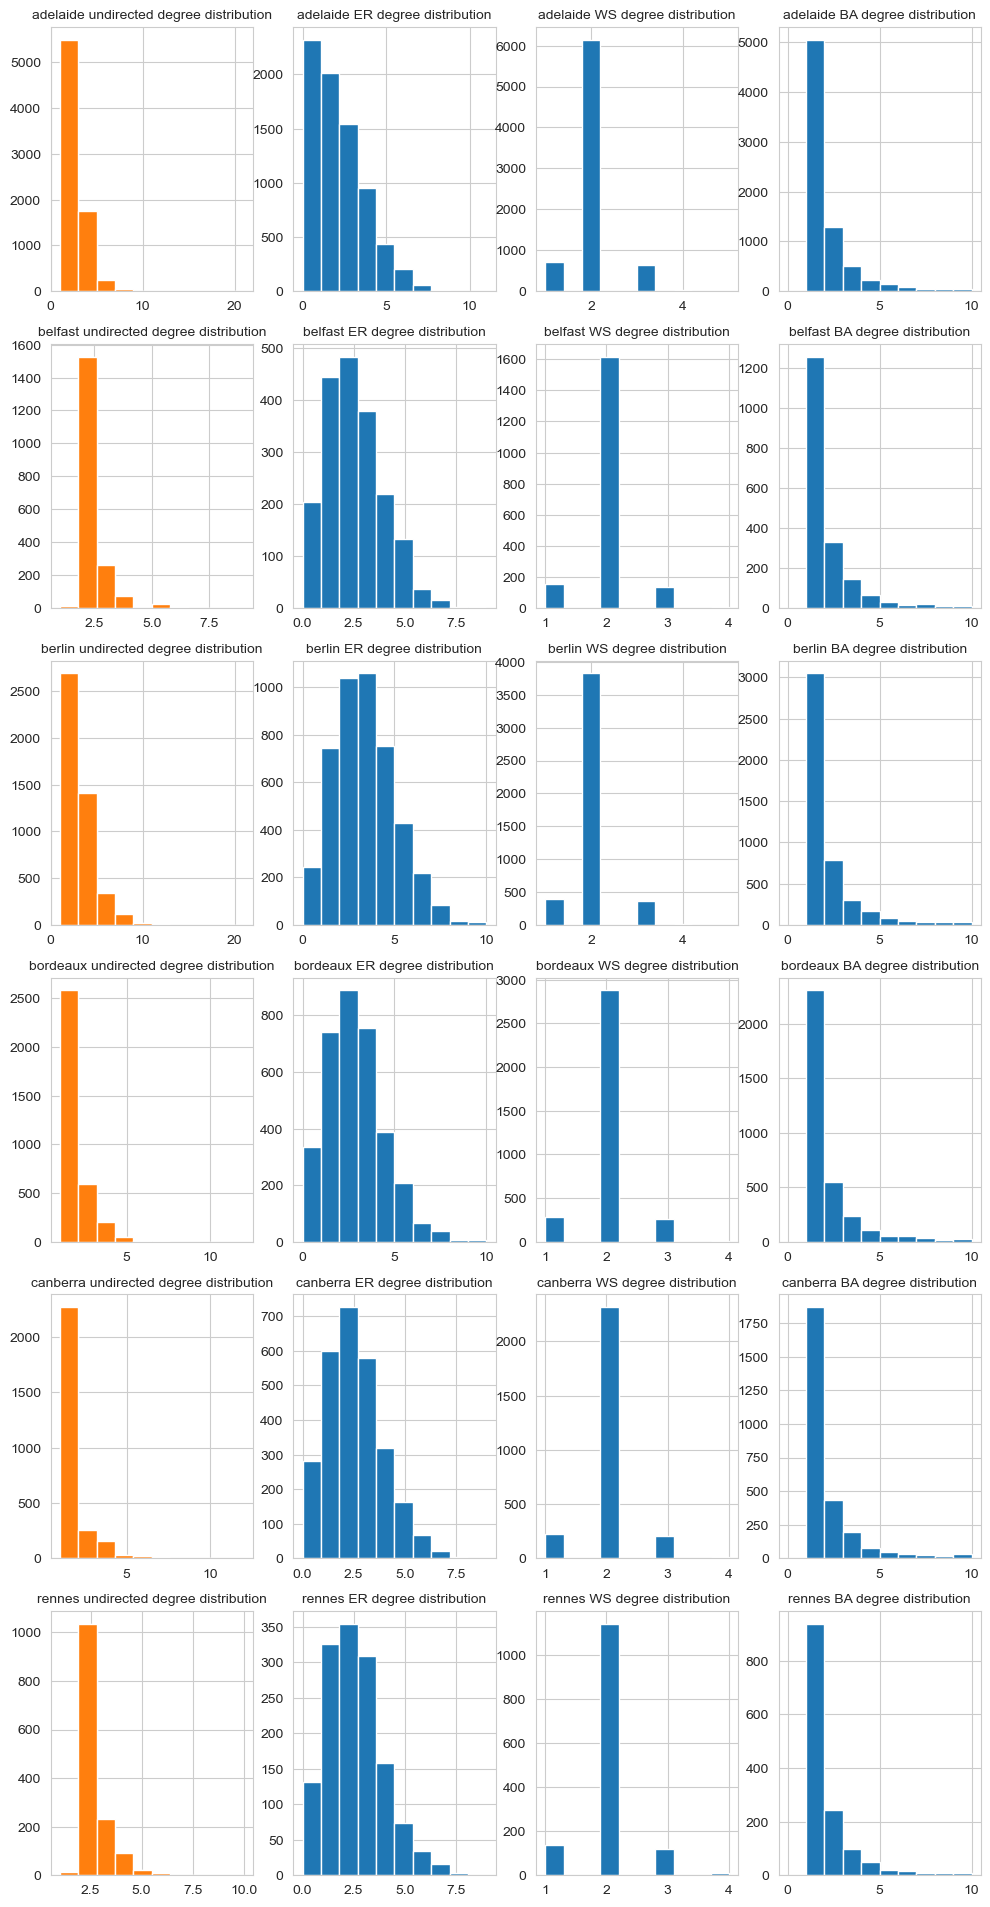

In [68]:
#plot the degree distribution of the original graph and the three random graphs
fig, axes = plt.subplots(len(City_list), 4, figsize=(12, 24))
for idx, city in enumerate(City_list):
    G = city[0].to_undirected()
    degrees = [d[1] for d in G.degree]
    axes[idx, 0].hist(degrees);
    axes[idx, 0].set_title('{} undirected degree distribution'.format(city[1]), fontsize = 10)
    axes[idx, 0].hist(degrees);
    axes[idx, 1].hist([d[1] for d in G_er_list[idx].degree]);
    axes[idx, 1].set_title('{} ER degree distribution'.format(city[1]), fontsize = 10)
    axes[idx, 2].hist([d[1] for d in G_ws_list[idx].degree]);
    axes[idx, 2].set_title('{} WS degree distribution'.format(city[1]), fontsize = 10)
    axes[idx, 3].hist([d[1] for d in G_ba_list[idx].degree], range=(0, 10));
    axes[idx, 3].set_title('{} BA degree distribution'.format(city[1]), fontsize = 10)
plt.show()


## Spectral analysis

In [86]:
from sklearn.cluster import KMeans

def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    lamb, U = np.linalg.eig(laplacian)
    lamb = lamb.real
    U = U.real
    idx = np.argsort(np.abs(lamb)) #abs in case the eigenvalues are complex
    return lamb[idx],U[:,idx]

def compute_laplacian(adjacency: np.ndarray):
    """ Return:
        L (np.ndarray): Laplacian matrix.
    """
    G_pygsp = pygsp.graphs.Graph(adjacency)

    G_pygsp.compute_laplacian("normalized")  
    L = G_pygsp.L.toarray().astype(float)
    return L

class SpectralClustering():
    def __init__(self, n_classes: int, normalize: str):
        self.n_classes = n_classes
        self.normalize = normalize
        self.clustering_method = KMeans(n_classes, random_state=0, n_init=10)
        
    def fit_predict(self, G: nx.Graph):
        """ Return:
            y_pred (np.ndarray): cluster assignments.
        """
        L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
        lambd, X = spectral_decomposition(L)
        X = X[:,:6] #keeping low-frequency eigenvectors to capture components 
        return self.clustering_method.fit_predict(X) 


In [87]:
G = City_list[5][0]
G = G.to_undirected()
spectral_clustering = SpectralClustering(n_classes=10, normalize=None)
G_clusters_comb = spectral_clustering.fit_predict(G)


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))


  id          name stop_I                   geometry
0  0  Longs Champs      1  POINT (-1.63253 48.12908)
1  1        Bouzat      2  POINT (-1.63778 48.12828)
2  2        Gallet      3  POINT (-1.64043 48.12737)
3  3      Donzelot      4  POINT (-1.64268 48.12524)
4  4      Mirabeau      5  POINT (-1.64632 48.12336)


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\1957945937.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = np.column_stack((boundary_geojson.centroid.x, boundary_geojson.centroid.y))
C:\Users\benji\AppData\Local\Temp\ipykernel_72948\1957945937.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = np.column_stack((boundary_geojson.centroid.x, boundary_geojson.centroid.y))


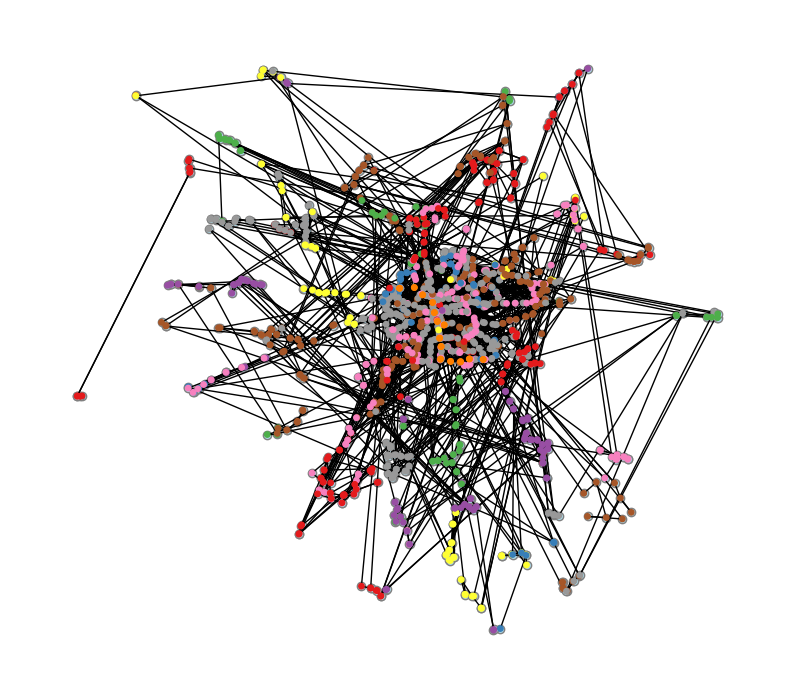

In [90]:
import geopandas as gpd

boundary_geojson = gpd.read_file('data/rennes/stops.geojson')
print(boundary_geojson.head())
centroids = np.column_stack((boundary_geojson.centroid.x, boundary_geojson.centroid.y))

positions = dict(zip(G.nodes, centroids))


ax = boundary_geojson.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", figsize=(10, 10))
#ax.axis([-12, 45, 33, 66])
#ax.axis("off")
node_clusters=G_clusters_comb
nx.draw(G, positions, ax=ax, node_size=15, node_color=[plt.cm.Set1(c) for c in node_clusters]if node_clusters is not None else "gray")
plt.show()

In [45]:
def check_same_common_routes(most_common_routes, i, j):
    try:
        if (most_common_routes[i][0][0] == most_common_routes[j][0][0] or
            most_common_routes[i][1][0] == most_common_routes[j][0][0] or
            most_common_routes[i][0][0] == most_common_routes[j][1][0] or 
            most_common_routes[i][1][0] == most_common_routes[j][1][0]
            ):
            return True
        else:
            return False
    except IndexError:
        return False
    
num_of_same_common_routes = 0

for City in City_list:
    G = City[0].to_undirected()
    spectral_clustering = SpectralClustering(n_classes=10, normalize=None)
    G_clusters_comb = spectral_clustering.fit_predict(G)

    #print the atributs of the first edge
    routes=nx.get_edge_attributes(G,'routes')
    routes = {k: v.split(',') for k, v in routes.items()}

    most_common_routes = []
    # check the number of occurences of each route for each cluster
    for i in range(10):
        print('cluster {}'.format(i))
        routes_list = []
        for key, value in routes.items():
            if key[0] < G_clusters_comb.size and key[1] < G_clusters_comb.size:
                if G_clusters_comb[key[0]] == i and G_clusters_comb[key[1]] == i:
                    routes_list.extend(value)
        print(Counter(routes_list).most_common(2))
        print('')
        most_common_routes.append(Counter(routes_list).most_common(2))

    # check if the cluster have the one common route in common
    for i in range(10):
        for j in range(i+1, 10):
            if check_same_common_routes(most_common_routes, i, j):
                num_of_same_common_routes += 1
                print('cluster {} and cluster {} have a route in common'.format(i, j))

print('number of clusters that have a route in common: {}'.format(num_of_same_common_routes))    



C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
2023-06-06 13:32:56,416:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


cluster 0
[('62:19', 127), ('61:13', 72)]

cluster 1
[('537:106', 22), ('537:99', 3)]

cluster 2
[('330:4', 7), ('363:1', 7)]

cluster 3
[('524:36', 38), ('523:8', 28)]

cluster 4
[('352:5', 28), ('351:4', 23)]

cluster 5
[('363:1', 48), ('156:1', 33)]

cluster 6
[('353:10', 26), ('352:5', 25)]

cluster 7
[('329:7', 57), ('330:3', 41)]

cluster 8
[('275:1', 63), ('323:1', 45)]

cluster 9
[('473:2', 2), ('473:3', 2)]

cluster 2 and cluster 5 have a route in common
cluster 4 and cluster 6 have a route in common


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))


cluster 0
[('45:1', 22), ('30:27', 17)]

cluster 1
[('59:25', 9), ('86:1', 9)]

cluster 2
[('9:3', 9), ('57:54', 8)]

cluster 3
[('45:1', 17), ('104:2', 14)]

cluster 4
[('48:24', 13), ('49:23', 13)]

cluster 5
[('96:1', 4), ('32:24', 4)]

cluster 6
[('34:3', 26), ('28:32', 21)]

cluster 7
[('101:10', 7), ('14:44', 5)]

cluster 8
[('76:21', 7), ('4:30', 5)]

cluster 9
[('5:6', 16), ('2:18', 14)]

cluster 0 and cluster 3 have a route in common


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
2023-06-06 13:37:21,604:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


cluster 0
[('819:9', 27), ('710:102', 24)]

cluster 1
[('834:8', 33), ('798:7', 17)]

cluster 2
[]

cluster 3
[]

cluster 4
[('1137:1', 1), ('1133:1', 1)]

cluster 5
[('803:8', 22), ('937:98', 15)]

cluster 6
[]

cluster 7
[('804:9', 17), ('653:104', 16)]

cluster 8
[('636:98', 13), ('801:8', 13)]

cluster 9
[('672:61', 18), ('723:60', 16)]



C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))


cluster 0
[('31:29', 26), ('27:42', 20)]

cluster 1
[]

cluster 2
[('68:2', 1), ('74:2', 1)]

cluster 3
[('34:18', 1)]

cluster 4
[]

cluster 5
[('3:93', 11), ('42:22', 7)]

cluster 6
[('59:19', 13), ('80:2', 12)]

cluster 7
[('3:93', 3), ('4:94', 3)]

cluster 8
[]

cluster 9
[('38:27', 8), ('35:27', 8)]

cluster 5 and cluster 7 have a route in common


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))


cluster 0
[('6:33', 32), ('75:27', 27)]

cluster 1
[('137:27', 56), ('285:3', 55)]

cluster 2
[('104:19', 15), ('212:18', 14)]

cluster 3
[('174:3', 1), ('119:24', 1)]

cluster 4
[('75:27', 29), ('95:24', 16)]

cluster 5
[('261:3', 52), ('15:34', 40)]

cluster 6
[('107:24', 19), ('116:16', 15)]

cluster 7
[('252:3', 17), ('249:3', 13)]

cluster 8
[('288:2', 13), ('255:3', 13)]

cluster 9
[('252:3', 33), ('224:15', 21)]

cluster 0 and cluster 4 have a route in common
cluster 7 and cluster 9 have a route in common


C:\Users\benji\AppData\Local\Temp\ipykernel_72948\3335151236.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
c:\Users\benji\anaconda3\envs\NML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


cluster 0
[('21:39', 19), ('48:8', 11)]

cluster 1
[('5:109', 8), ('4:107', 5)]

cluster 2
[('29:37', 11), ('29:39', 11)]

cluster 3
[('30:36', 21), ('23:39', 9)]

cluster 4
[('51:416', 10), ('44:12', 4)]

cluster 5
[('39:2', 7), ('23:41', 6)]

cluster 6
[('14:15', 20), ('31:31', 19)]

cluster 7
[('6:84', 13), ('20:33', 11)]

cluster 8
[('7:109', 18), ('22:35', 8)]

cluster 9
[('3:92', 32), ('2:87', 18)]

number of clusters that have a route in common: 6


In [73]:
laplacian = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
laplacian = (laplacian + laplacian.T) / 2    # Make sure the matrix is symmetric despite numerical errors
lam, U = spectral_decomposition(laplacian)

argsort = np.argsort(lam)
lam = lam[argsort]
U = U[:, argsort]

C:\Users\benji\AppData\Local\Temp\ipykernel_57636\2223867675.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  laplacian = compute_laplacian(nx.adjacency_matrix(G).toarray().astype(float))
2023-06-04 14:00:00,535:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


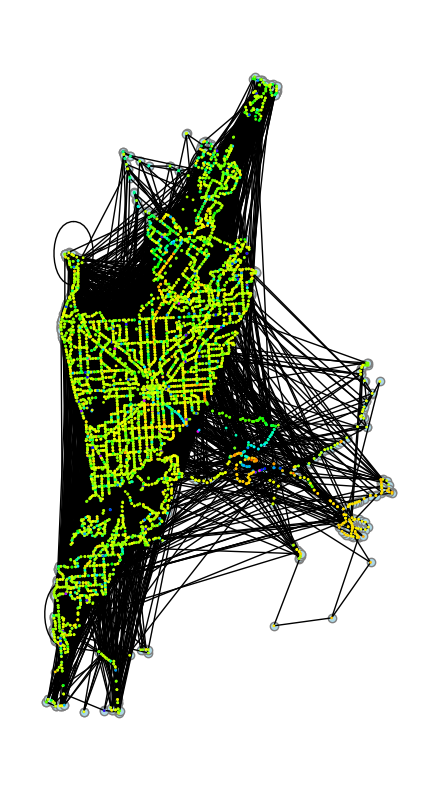

In [74]:
x = U[:, 5] 
ax = boundary_geojson.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", figsize=(10, 10))
nx.draw(G, positions, ax=ax, node_size=1, node_color=x, cmap=plt.cm.hsv)
plt.show()